In [3]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of plots

#Read in the data

df = pd.read_csv(r'C:\Users\stone\Desktop\movies.csv')


In [ ]:
#Look at the data

df.head()

In [ ]:
#Looking for missing data
df = df.dropna()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

In [ ]:
#Data types of columns

df.dtypes

In [ ]:
#Changing data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
#df

In [ ]:
#Correcting release year errors

df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
#df

In [ ]:
#df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#Drop duplicates

#df['company'].drop_duplicates().sort_values(ascending = False)

In [ ]:
#Scatter plot with budget vs gross revenue


plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

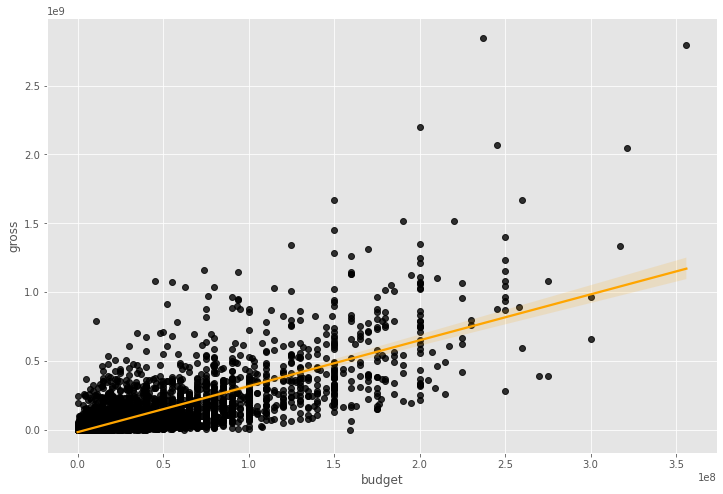

In [6]:
#Regression plot budget vs gross
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "black"}, line_kws = {"color":"orange"})

In [ ]:
df.corr()

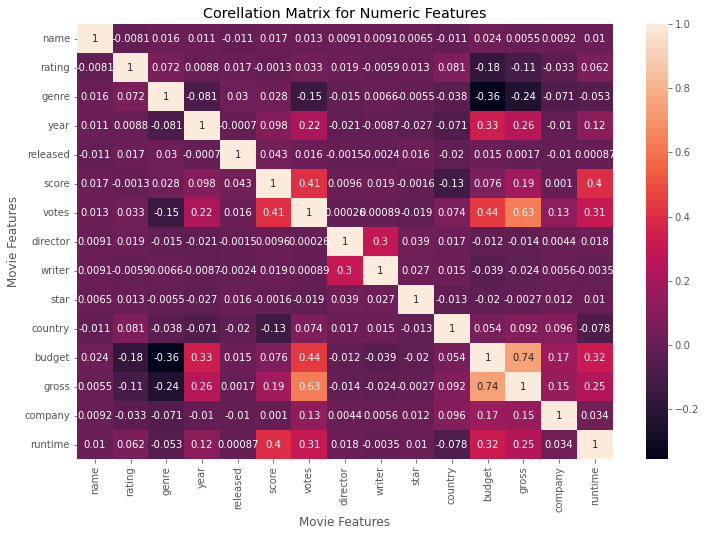

In [10]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Corellation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [8]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#df_numerized

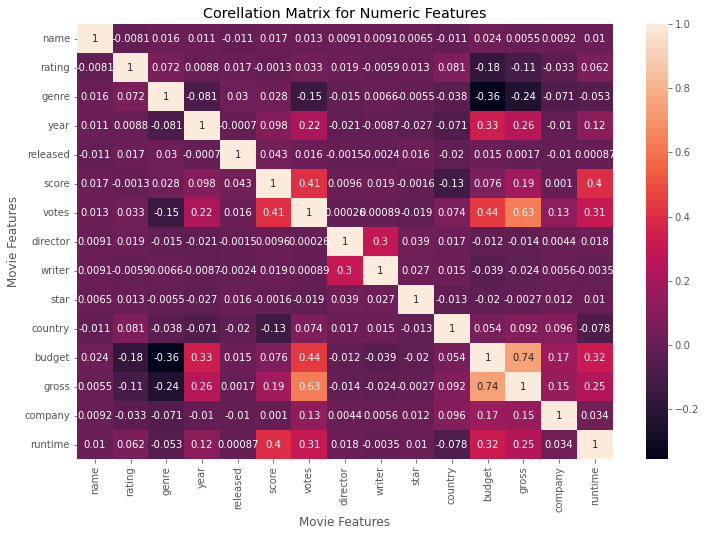

In [9]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Corellation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
df_numerized.corr()

In [ ]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

#corr_pairs

In [ ]:
sorted_pairs = corr_pairs.sort_values(ascending = False)

#sorted_pairs

In [ ]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

In [ ]:
#Votes and Budgets have the highest correlation to gross earnings